In [1]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [2]:
import lucem_illud
import gensim
import sklearn

In [6]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx

In [7]:
import seaborn as sns

In [10]:
import pandas as pd

## Load comment data from json file

In [4]:
import json
# Opening JSON file
with open("scrap-result.json") as json_file:
    textual_data = json.load(json_file)

In [5]:
len(textual_data.keys())

100

In [20]:
def plotting_pieces_comments_of_each_character():
    hero_comments_num = {}
    for key, value in textual_data.items():
        hero_comments_num[key] = len(value)
    plt.figure(figsize = [15, 10])
    df = pd.DataFrame(hero_comments_num.items(), columns=['character', 'number of pieces of comment'])
    ax = sns.scatterplot(x="character", y="number of pieces of comment", data=df)
    ax.set_xticklabels(list(hero_comments_num.keys()))
    plt.xticks(rotation = 270, fontsize = 8)
    plt.savefig("number of pieces of comment.png")
    plt.show()
    i = 0
    for key, value in hero_comments_num.items():
        if value == 2000:
            i += 1
    print("There are {} characters who have more than 2000 comments in subreddit".format(i))
            
        

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/679419287.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(hero_comments_num.keys()))


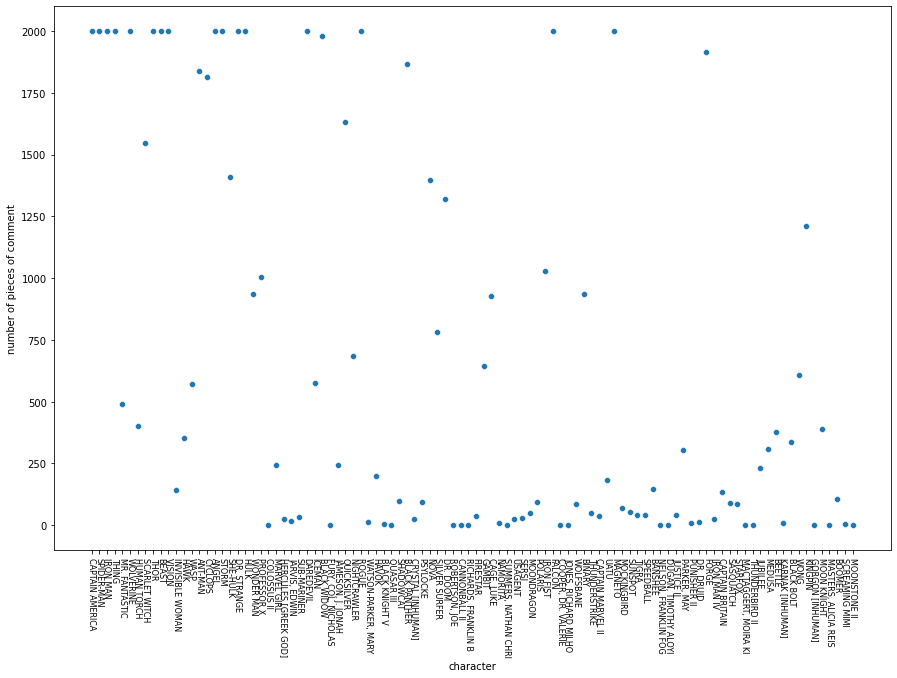

There are 16 characters who have more than 2000 comments in subreddit


In [21]:
plotting_pieces_comments_of_each_character()

In [22]:
#combine the comments corresponding to each character into a document
textual_data_new = {}
for key, value in textual_data.items():
    string = ' '.join(value)
    textual_data_new[key] = string

In [23]:
df = pd.DataFrame(textual_data_new.items(), columns=['character', 'document'])

In [24]:
df[:5]

,character,document
0,CAPTAIN AMERICA,She was never said to be the strongest or must...
1,SPIDER-MAN,Because it doesn't matter how skilled you are ...
2,IRON MAN,Would an iron man suit overpower them? Iron Ma...
3,THING,&gt;Eru is an omnipotent and omniscient god\n\...
4,MR. FANTASTIC,"Im just stuck on the issue of, if she made her..."


------

### store the data into data file

In [25]:
import csv
with open("textual_data.csv","w") as csvfile:
    writer = csv.writer(csvfile)
    for key, value in textual_data.items():
        for v in value:
            writer.writerow([key, v])

In [26]:
df2 = pd.read_csv("textual_data.csv", header = None, names = ["character","comment"])

In [27]:
df2[:5]

,character,comment
0,CAPTAIN AMERICA,She was never said to be the strongest or must...
1,CAPTAIN AMERICA,Are you talking Netflix Kingpin or Comics King...
2,CAPTAIN AMERICA,In my collection alone I've got Batman/Punishe...
3,CAPTAIN AMERICA,"There's no worthiness enchantment, like with M..."
4,CAPTAIN AMERICA,Possibly Captain America. Magneto has a gigant...


### Warnings: This takes more than 50 minutes, there are 64435 overall comments for 100 heros 
### This step aims to tokenized documents and normalized tokens

In [28]:
df2['tokenized_words'] = df2['comment'].apply(lambda x: lucem_illud.word_tokenize(x))
df2['normalized_words'] = df2['tokenized_words'].apply(lambda x: lucem_illud.normalizeTokens(x, lemma=False))

/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/opt/anaconda3/lib/python3.8/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


In [29]:
df2[:5]

,character,comment,tokenized_words,normalized_words
0,CAPTAIN AMERICA,She was never said to be the strongest or must...,"[She, was, never, said, to, be, the, strongest...","[said, strongest, power, probably, effective, ..."
1,CAPTAIN AMERICA,Are you talking Netflix Kingpin or Comics King...,"[Are, you, talking, Netflix, Kingpin, or, Comi...","[talking, netflix, kingpin, comics, kingpin, c..."
2,CAPTAIN AMERICA,In my collection alone I've got Batman/Punishe...,"[In, my, collection, alone, I, 've, got, Batma...","[collection, ve, got, batman, punisher, batman..."
3,CAPTAIN AMERICA,"There's no worthiness enchantment, like with M...","[There, 's, no, worthiness, enchantment, like,...","[worthiness, enchantment, like, mjolnir, simpl..."
4,CAPTAIN AMERICA,Possibly Captain America. Magneto has a gigant...,"[Possibly, Captain, America, Magneto, has, a, ...","[possibly, captain, america, magneto, gigantic..."


In [32]:
df2.to_csv("tokenized comments.csv")

In [30]:
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [31]:
from gensim.parsing.preprocessing import preprocess_documents

### put all comments into the corpus

In [33]:
corpus = []
for key, value in textual_data.items():
        for v in value:
            corpus.append(v)

In [34]:
len(corpus)

64435

### There are totally 64435 pieces of comments

----

In [35]:
i = 0
for index, row in df2.iterrows():
    i += len(row["tokenized_words"])
print("There are totally {} number of tokenized words".format(i))
    

There are totally 7850764 number of tokenized words


In [37]:
j = 0
for index, row in df2.iterrows():
    j += len(row["normalized_words"])
print("There are totally {} number of normalized words".format(j))

There are totally 3552351 number of normalized words


## corpus (total pieces of comments): 64435
## tokenized word per message : 121.84
## vocabular size:7850746
## normalized words size: 3552351
## average normalized tokens for each comment: 55.13


In [39]:
#this process takes around 20 minutes
preprocessed_texts = preprocess_documents(corpus)
dictionary = Dictionary(preprocessed_texts)
corpus_transform = [dictionary.doc2bow(text) for text in preprocessed_texts]

In [40]:
ldamodel = LdaModel(corpus=corpus_transform, num_topics=10, id2word=dictionary)

In [43]:
ldamodel.print_topics()

[(0,
  '0.026*"power" + 0.017*"mutant" + 0.016*"like" + 0.013*"magneto" + 0.012*"human" + 0.012*"forg" + 0.008*"forc" + 0.007*"peopl" + 0.007*"world" + 0.006*"level"'),
 (1,
  '0.010*"marvel" + 0.008*"comic" + 0.008*"year" + 0.008*"earth" + 0.007*"hulk" + 0.007*"time" + 0.006*"aveng" + 0.006*"univers" + 0.006*"charact" + 0.006*"ag"'),
 (2,
  '0.028*"man" + 0.026*"knight" + 0.025*"spider" + 0.023*"moon" + 0.015*"kingpin" + 0.013*"like" + 0.012*"hero" + 0.011*"peter" + 0.010*"daredevil" + 0.010*"marvel"'),
 (3,
  '0.030*"stone" + 0.027*"thano" + 0.022*"thor" + 0.019*"power" + 0.010*"fight" + 0.009*"hulk" + 0.009*"infin" + 0.008*"time" + 0.007*"us" + 0.007*"kill"'),
 (4,
  '0.024*"kill" + 0.016*"like" + 0.014*"peopl" + 0.010*"think" + 0.010*"batman" + 0.009*"good" + 0.009*"joker" + 0.008*"want" + 0.008*"know" + 0.008*"gui"'),
 (5,
  '0.023*"time" + 0.012*"univers" + 0.011*"strang" + 0.010*"know" + 0.008*"magic" + 0.008*"doom" + 0.008*"like" + 0.007*"world" + 0.007*"happen" + 0.006*"earth"

In [41]:
ldatexts = ldamodel[corpus_transform]

In [42]:
ldatexts[0]

[(1, 0.100714594),
 (3, 0.5681022),
 (4, 0.25958192),
 (7, 0.048840664),
 (8, 0.014794306)]

In [43]:
node_dg_sort =  sorted(ldatexts[0], key=lambda item: item[1], reverse = True)[0]

In [44]:
node_dg_sort

(3, 0.5679481)

In [46]:
#label each document with accuracy
label = []
prob_topic = []
for i in range(len(corpus)):
    label_highest =  sorted(ldatexts[i], key=lambda item: item[1], reverse = True)[0][0]
    prob = sorted(ldatexts[i], key=lambda item: item[1], reverse = True)[0][1]
    label.append(label_highest)
    prob_topic.append(prob)    

In [49]:
df2["topic"] = label
df2["probability"] = prob_topic

In [50]:
df2

,character,comment,tokenized_words,normalized_words,topic,probability
0,CAPTAIN AMERICA,She was never said to be the strongest or must...,"[She, was, never, said, to, be, the, strongest...","[said, strongest, power, probably, effective, ...",3,0.567845
1,CAPTAIN AMERICA,Are you talking Netflix Kingpin or Comics King...,"[Are, you, talking, Netflix, Kingpin, or, Comi...","[talking, netflix, kingpin, comics, kingpin, c...",3,0.591648
2,CAPTAIN AMERICA,In my collection alone I've got Batman/Punishe...,"[In, my, collection, alone, I, 've, got, Batma...","[collection, ve, got, batman, punisher, batman...",5,0.752695
3,CAPTAIN AMERICA,"There's no worthiness enchantment, like with M...","[There, 's, no, worthiness, enchantment, like,...","[worthiness, enchantment, like, mjolnir, simpl...",4,0.746553
4,CAPTAIN AMERICA,Possibly Captain America. Magneto has a gigant...,"[Possibly, Captain, America, Magneto, has, a, ...","[possibly, captain, america, magneto, gigantic...",2,0.702112
...,...,...,...,...,...,...
64430,BOOMER,But Athena had the experience of being on the ...,"[But, Athena, had, the, experience, of, being,...","[athena, experience, run, helio, caprica, boom...",2,0.348732
64431,BOOMER,"Not sure how it started, but it seems to me th...","[Not, sure, how, it, started, but, it, seems, ...","[sure, started, resurrected, skin, job, retain...",7,0.518517
64432,SCREAMING MIMI,Here's another borderline case: the Thunderbol...,"[Here, 's, another, borderline, case, the, Thu...","[borderline, case, thunderbolts, thunderbolts,...",1,0.401771
64433,SCREAMING MIMI,The few that I know that wasn't mentioned yet:...,"[The, few, that, I, know, that, was, n't, ment...","[know, mentioned, brief, time, grizzly, gibbon...",6,0.475537


In [71]:
def filter_comments_topic_likelihood(df2, n, topic_num):
    "print out top n comments of selected topic with highest accuracy"
    df = df2[df2["topic"] == topic_num]
    df.sort_values(by = "probability", inplace = True, ascending = False)
    for index, row in df[:n].iterrows():
        print("comment: " + "{}".format(row["probability"]) + " " +row["comment"])
        print("---------------------------")
        
        
    

In [72]:
filter_comments_topic_likelihood(df2, 10, 1) # masculine + higher status + political ideology + caring

comment: 0.9678431749343872 Doom is legitimately better than many authoritarians in that his desire to give the people he brutally rules over with a literal and figurative iron fist a better life is sincere.

But he will not accept any course of action that involves him doing so by *not* brutally ruling over them with an iron fist and doing as much violence as necessary to establish and enforce that rule.
---------------------------
comment: 0.9590727686882019 No.

Captain America believes in what America is supposed to represent, not what the country really is.

He's perfectly aware of the many fallings of his nation and is ashamed of them.

He likes the american dream and the american values ( Freedom, Security and the pursuit of happiness?
---------------------------
comment: 0.957081139087677 He’s a veteran. At no point has it shown (that I could remember) that Capt still has fulfill any military obligations.

He’s Captain America cause he earned that rank and can still use it. 

I

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [73]:
filter_comments_topic_likelihood(df2, 10, 0) # weapon war & universe
#https://marvelcinematicuniverse.fandom.com/wiki/World_Forge

comment: 0.98783278465271 There's also a history of such devices being used as super weapons. The World Devastators operated in exactly the same way, taking raw resources and creating finished products, and eventually creating more World Devastators. Or the Star Forge, while not self propagating, was still viewed as one of the most dangerous weapons in galactic history. Even in the right hands, such technology was very dangerous, and heavily supervised. Courscant used massive machines to tear down old buildings and create new ones, but one glitch or incorrect command could lead to the deaths of millions. 

Even if being used for peaceful purposes, the galaxy would be suspicious at best, and possibly hostile. Even a peaceful world might fear it. Empty asteroids and isolated planets are one thing. But who's to say it won't go wrong and target a more populated planet? Because shit like that happens pretty much every other week in the Star Wars galaxy. 
---------------------------
comment:

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [74]:
filter_comments_topic_likelihood(df2, 10, 2) # team & communities & relationships

comment: 0.9898806214332581 When Wolverine was brought onto the team, it was a period of massive transition, with the original team (Cyke, Jean, Beast, Iceman, Angel) being captured, and the second team (Storm, Wolvie, Thunderbird, Nightcrawler, Colossus, Banshee, and Sunfire) were gathered to bail them out by Prof X and Cyke. Wolvie was a more experienced adventurer, being part of Canada's Weapon X project, and, in reality, having been alive since the mid 19th century. 

Wolvie alwas clashed with Cyke, and then the Jean thing got deeper in the way. Wolvie loved Jean, Jean loved Scott and Scott loved Jean. When Jean first goes Dark Phoenix, it's Wolvie who has to kill her, but Scotty gets to hold the famous pieta... 

Over time, as they spend time on different teams, and then back together again, Cyke falls into a more militant version of mutant liberation, and Wolverine falls into the Professor X Dream camp. 

I've never been a Scotty fan, but as I get older... And also the further Ch

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [75]:
filter_comments_topic_likelihood(df2, 10, 3) #superpower and specialities

comment: 0.9892709851264954 My personal pick?  Any sort of eye-based laser beams.  

Your eyes are very often, if not constantly moving in micoscopic adjustments.  In addition to making up basically everything you see, your brain makes a lot of edits that make it so that you don't notice it usually, but you really move your eyes around a lot even if you think you're focused on one  point.  Being able to aim lasers with your eyes is pretty much impossible - you'd be shooting them everywhere.  Even if you just did a quick burst there's a decent chance your eyes could shift ever so subtly and miss their mark.  This gets worse over longer distances, where even small misadjustments in aim can throw off the aim completely.  

And that's not considering the lack of secondary powers - are your eyes immune to the heat?  Can you control it or are you like Cyclops?  If you can't control it, can you stop it by closing your eyes, or do you just burn out your eyelids constantly?  Where does the ener

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [77]:
filter_comments_topic_likelihood(df2, 10, 4) #discussions & imagination about what will happen if XXX 

comment: 0.9953579306602478 That depends on how much Doctor Strange knows. If he knows as much about *Avengers: Endgame* as the audience does, he should be able to figure out where Thanos' farm is and rally the Avengers to take the Gauntlet from the Titan, especially since Stormbreaker will be available for them to use. However, since Ancient One was unable to see events past her own death, it's possible that the Time Stone only showed Strange the events the took place before his death and after &gt;!his revival.!&lt; If that's the case, Strange won't know where Thanos is hiding and the Avengers won't be able to find the Infinity Stones.

However, with Hank Pym alive and Janet van Dyne well-aware of the nature of the Quantum Realm, they should be able to almost immediately build &gt;!a Quantum Time Machine.!&lt; With that, they should be able to track down the Stones much like the Avengers did. Falcon, Hope, Bucky, and Doctor Strange should be able to find the Space, Mind, and Time Sto

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [78]:
filter_comments_topic_likelihood(df2, 10, 5) #civilian identity to against crime 

comment: 0.9795351624488831 Sometimes I wonder why Batman keeps his identity a secret while Iron-Man gives no fuck. Both are rich billionaires, if their enemies "know who their family members are" then Tony just builds more ironman drones and suits to protect them, he's rich anyways, who cares if some thug wants payback. But Batman wants to keep everyone in the shadows. I wonder why. Bruce has no reason to fear for his family because as a billionaire he can probably afford more security for them than normal Gotham citizens can ever dream of being protected. 
---------------------------
comment: 0.9727205038070679 Heroes that fight crime usually do it  vigilante style (Batman. Spider-Man. Daredevil. Moon Knight. Green Arrow) it's usually global threats where the heroes and the governments meet (sometimes together someone's not) if heroes tell the government they're gonna stop fighting crime I don't think the government would care much because that's technically what the police are for 


/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [79]:
filter_comments_topic_likelihood(df2, 10, 6) #time-infinite and alternative universe

comment: 0.97749263048172 &gt;Time travel doesn't work that way in the MCU 

It's not really true time travel in the MCU though, it's more like jumping into parallel universes that haven't caught up with our own time stream.

&gt;  You can't change your own past by going back and altering things. 

Captain America wouldn't be changing the past, he would still be be changing the future of the parallel universe since all the events mentioned in the original post wouldn't have happened in the alternate timeline.
---------------------------
comment: 0.9749937653541565 &gt; I assume that you don't have to travel to the past of your own timeline, but can travel to the past/present/future of any timeline,

With that, would it be possible for a non-original MCU timeline traveler or a Variant, to end up traveling back to the *true* *original* MCU timeline, which could in a way Watsonianly/in-universely explain why there was an Ant-man actor in the particular stage play, because *an* Ant-Man cou

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [80]:
filter_comments_topic_likelihood(df2, 10, 7) #mutant, non-human

comment: 0.95907062292099 &gt; In this sense, if Wolverine kills someone, then Professor X and the X-Men basically pre-approved their death. 

Who are those people to "pre-approve" a death? Who gave them the authority to do it? Themselves?

Because, in that case, they also have made themselves "judge, jury and executor" and aren't any better than the Punisher.
---------------------------
comment: 0.952599823474884 His body has been taken over by a rogue artificial intelligence. It's as simple as changing some ones and zeroes to alter hormone production, remove natural inhibitors, and simply shut off pain receptors
---------------------------
comment: 0.9525782465934753 They are easier to Control if its a temporary boost, if they go rogue they will turn into regular humans soon enough Becasue they aren't given the drug anymore. Give them a permanent boost and they can just go rogue after getting it
---------------------------
comment: 0.9470776915550232 People are racist. They think mut

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [81]:
filter_comments_topic_likelihood(df2, 10, 8) # Magic, oveconfidence

comment: 0.9785642027854919 Right, of course, but she was hoping to find personal redemption for the bad things she'd done while under his influence, and thought that by proving he was real and affecting other people that she'd find it.  Was this a good plan?  Obviously not, Kilgrave is way too dangerous, and I think she found her redemption by the end anyway (the whole Luke Cage thing was a big part of it IMO), but that thinking informed her decision making for most of the series.

I guess what I'm saying is that I don't think she was necessarily right in thinking the way she was, but regardless that is what she was thinking.
---------------------------
comment: 0.9763054251670837 To be fair, appealing to the school would still not solve Peter's problems. Mysterio turned most of the world against Peter by making him out to be the villain. Strange's "forget me" spell would probably have been the only thing that could have fixed Peter's reputation as well as the reputation of others ass

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [82]:
filter_comments_topic_likelihood(df2, 10, 9) # ultimate adamantium

comment: 0.9699901938438416 nah, there is something holding him together. when he is turned to a skeleton by fire, it sticks [together](http://vignette3.wikia.nocookie.net/marvelcrossroads/images/0/0c/Wolverine_Skeleton_\(Spideyverse\).jpg/revision/latest?cb=20130729013431), and 616 hulk has [tried](https://comicvine1.cbsistatic.com/uploads/scale_super/8/80103/2955267-2640199-696663_sixhoursph4_super.jpg) to rip wolvy but couldnt
---------------------------
comment: 0.962204098701477 https://www.google.com/search?q=quiksilver&amp;newwindow=1&amp;rlz=1C1AVNG_enUS655US655&amp;es_sm=122&amp;biw=1360&amp;bih=681&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0CAcQ_AUoAmoVChMIjKzHg6POxwIVhjiICh0QGQR0#newwindow=1&amp;tbm=isch&amp;q=quicksilver+marvel
---------------------------
comment: 0.9608399868011475 another example of ultimate adamantium being weaker than 616 is when[ hulk ripped](https://i.stack.imgur.com/9IXei.jpg) wolverine in two, with logan noting that it wasnt that [unbreakable af

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/2402330059.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by = "probability", inplace = True, ascending = False)


In [90]:
from matplotlib import pyplot as plt
import seaborn as sns

In [93]:
def get_result_of_character(df2, name):
    df = df2[df2["character"] == name]
    ax = sns.boxplot(x="character", y="probability", data=df)
    ax.set_xticklabels([name])
    plt.show()
    

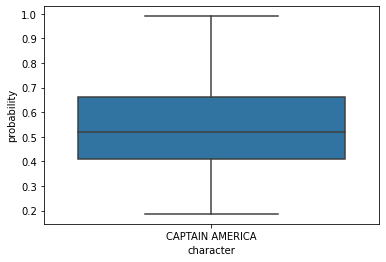

In [94]:
get_result_of_character(df2, "CAPTAIN AMERICA")

In [104]:
def plot_result_of_character(df2, name):
    df = df2[df2["character"] == name]
    ax = sns.boxplot(x="topic", y="probability", data=df)
    plt.show()

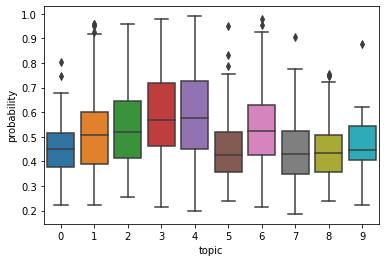

In [105]:
plot_result_of_character(df2, "CAPTAIN AMERICA")

In [108]:
def bar_result_of_character(df2, name):
    """
    plot the topic frequency of comments which describe a character
    Input:
    df2:dataframe
    name: the target character
    """
    df = df2[df2["character"] == name]
    df.topic.value_counts().sort_values().plot(kind = 'barh')
    plt.title("Topic frequence for comments of {}".format(name))
    plt.show()

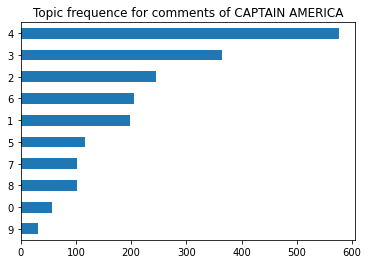

In [109]:
bar_result_of_character(df2, "CAPTAIN AMERICA") 

In [111]:
from scipy import stats
df3 = df2.groupby("character").agg(pd.Series.mode)
dic_topic = df3["topic"].to_dict()
print(dic_topic)

{'ANGEL': 0, 'ANT-MAN': 4, 'BANSHEE': 2, 'BEAST': 0, 'BEETLE': 2, 'BINARY': 0, 'BLACK BOLT': 3, 'BLACK KNIGHT V': array([2, 3]), 'BLACK PANTHER': 4, 'BLACK WIDOW': 4, 'BOOMER': 8, 'CAGE, LUKE': 8, 'CAPTAIN AMERICA': 4, 'CAPTAIN BRITAIN': 2, 'CAPTAIN MARVEL II': 4, 'COLOSSUS II': array([0, 8]), 'CRYSTAL [INHUMAN]': 7, 'CYCLOPS': 3, 'DAREDEVIL': 8, 'DR. DOOM': 6, 'DR. DRUID': 8, 'DR. STRANGE': 4, 'FALCON': 4, 'FIRESTAR': 2, 'FORGE': 0, 'GAMBIT': 0, 'GORGON [INHUMAN]': array([2, 3]), 'HAVOK': 2, 'HAWK': 5, 'HERCULES [GREEK GOD]': 2, 'HULK': 4, 'HUMAN TORCH': 2, 'ICEMAN': 2, 'INVISIBLE WOMAN': 2, 'IRON FIST': 8, 'IRON MAN': 4, 'IRON MAN IV': 3, 'JAMESON, J. JONAH': 1, 'JARVIS, EDWIN ': 4, 'JUBILEE': 2, 'JUSTICE II': array([0, 5]), 'KARNAK [INHUMAN]': 3, 'KINGPIN': 5, 'MAGNETO': 7, 'MARVEL GIRL': 2, 'MEDUSA': 2, 'MOCKINGBIRD': 4, 'MOON KNIGHT': 2, 'MOONDRAGON': 4, 'MR. FANTASTIC': 6, 'NAMORITA': array([4, 6]), 'NIGHTCRAWLER': 2, 'NOVA': 0, 'PARKER, MAY': 6, 'POLARIS': 2, 'PROFESSOR X': 7, '

In [117]:
def get_avg_prob_topic(df2, name, topic):
    df = df2[df2["character"] == name]
    df = df[df["topic"] == topic]
    return df["probability"].mean()


In [119]:
avg_prob = get_avg_prob_topic(df2, "CAPTAIN AMERICA", 4)

In [128]:
import numpy as np

/var/folders/j3/3t5_vv213b70kqdvyh7123280000gn/T/ipykernel_72091/3398218726.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(top_prob_hero.keys()))


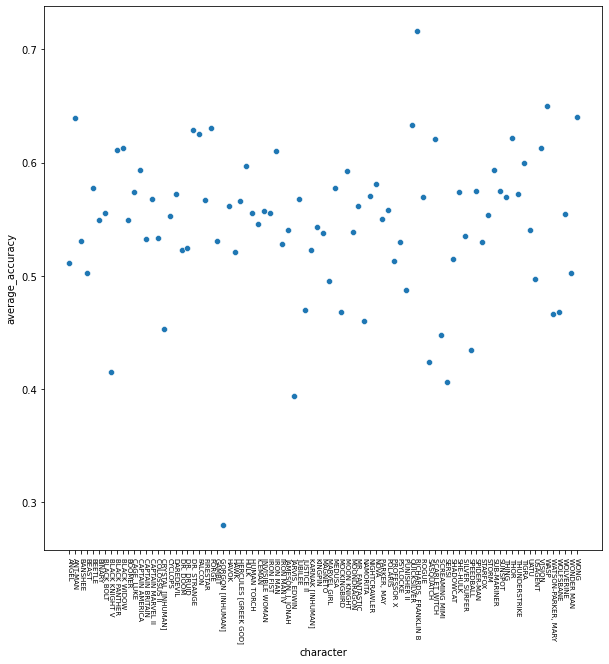

In [151]:
top_prob_hero = {}
for key, value in dic_topic.items():
    if type(value) != int:
        acc = 0
        for v in list(value):
            acc += get_avg_prob_topic(df2, key, v)
        top_prob_hero[key] = acc/len(list(value))
    else: 
        top_prob_hero[key] = get_avg_prob_topic(df2, key, value)
df_topic_hero_prob = pd.DataFrame(top_prob_hero.items(), columns=['character', 'average_accuracy'])
plt.figure(figsize = [10, 10])
ax = sns.scatterplot(x = "character", y = "average_accuracy", data=df_topic_hero_prob)
ax.set_xticklabels(list(top_prob_hero.keys()))
plt.xticks(rotation = 270, fontsize = 7)
plt.show()

In [152]:
top_prob_hero

{'ANGEL': 0.5114437341690063,
 'ANT-MAN': 0.639106273651123,
 'BANSHEE': 0.5309163928031921,
 'BEAST': 0.5028543472290039,
 'BEETLE': 0.5773575901985168,
 'BINARY': 0.5496124029159546,
 'BLACK BOLT': 0.5557151436805725,
 'BLACK KNIGHT V': 0.41549448668956757,
 'BLACK PANTHER': 0.6108616590499878,
 'BLACK WIDOW': 0.6127586364746094,
 'BOOMER': 0.5490119457244873,
 'CAGE, LUKE': 0.5740217566490173,
 'CAPTAIN AMERICA': 0.5936520099639893,
 'CAPTAIN BRITAIN': 0.5328088998794556,
 'CAPTAIN MARVEL II': 0.5676184892654419,
 'COLOSSUS II': 0.5335023105144501,
 'CRYSTAL [INHUMAN]': 0.4533674418926239,
 'CYCLOPS': 0.5531529784202576,
 'DAREDEVIL': 0.5722179412841797,
 'DR. DOOM': 0.5227572321891785,
 'DR. DRUID': 0.524276077747345,
 'DR. STRANGE': 0.6285252571105957,
 'FALCON': 0.6253274083137512,
 'FIRESTAR': 0.5666669011116028,
 'FORGE': 0.6305976510047913,
 'GAMBIT': 0.5305104851722717,
 'GORGON [INHUMAN]': 0.27974389493465424,
 'HAVOK': 0.5612958073616028,
 'HAWK': 0.52080237865448,
 'HERCUL

In [153]:
same_topic = {}
for key, value in dic_topic.items():
    if type(value) is int:
        if value in same_topic.keys():
            same_topic[value].append(key) 
        else:
            same_topic[value] = [key]
    else:
        for i in list(value):
            if i in same_topic.keys():
                same_topic[i].append(key) 
            else:
                same_topic[i] = [key]

        
    
    

In [154]:
same_topic

{0: ['ANGEL',
  'BEAST',
  'BINARY',
  'COLOSSUS II',
  'FORGE',
  'GAMBIT',
  'JUSTICE II',
  'NOVA',
  'ROGUE ',
  'SASQUATCH',
  'SERSI',
  'STORM'],
 4: ['ANT-MAN',
  'BLACK PANTHER',
  'BLACK WIDOW',
  'CAPTAIN AMERICA',
  'CAPTAIN MARVEL II',
  'DR. STRANGE',
  'FALCON',
  'HULK',
  'IRON MAN',
  'JARVIS, EDWIN ',
  'MOCKINGBIRD',
  'MOONDRAGON',
  'NAMORITA',
  'SCARLET WITCH',
  'SHE-HULK',
  'THOR',
  'THUNDERSTRIKE',
  'VISION ',
  'WASP',
  'WONG'],
 2: ['BANSHEE',
  'BEETLE',
  'BLACK KNIGHT V',
  'CAPTAIN BRITAIN',
  'FIRESTAR',
  'GORGON [INHUMAN]',
  'HAVOK',
  'HERCULES [GREEK GOD]',
  'HUMAN TORCH',
  'ICEMAN',
  'INVISIBLE WOMAN',
  'JUBILEE',
  'MARVEL GIRL',
  'MEDUSA',
  'MOON KNIGHT',
  'NIGHTCRAWLER',
  'POLARIS',
  'PSYLOCKE',
  'SCREAMING MIMI',
  'SHADOWCAT',
  'SILVER SURFER',
  'STARFOX',
  'SUB-MARINER',
  'SUNSPOT',
  'TIGRA',
  'USAGENT',
  'WOLVERINE'],
 3: ['BLACK BOLT',
  'BLACK KNIGHT V',
  'CYCLOPS',
  'GORGON [INHUMAN]',
  'IRON MAN IV',
  'KARNAK [

In [156]:
import networkx as nx

In [157]:
g_topic = nx.Graph()

In [158]:
import itertools
edges = []
for key, value in same_topic.items():
    for i in list(itertools.combinations(value,2)):
        edges.append(i)
    

In [159]:
g_topic.add_edges_from(edges)

In [160]:
color_lookup = {}
for key, value in same_topic.items():
    for v in value:
        color_lookup[v] = key

In [161]:
low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

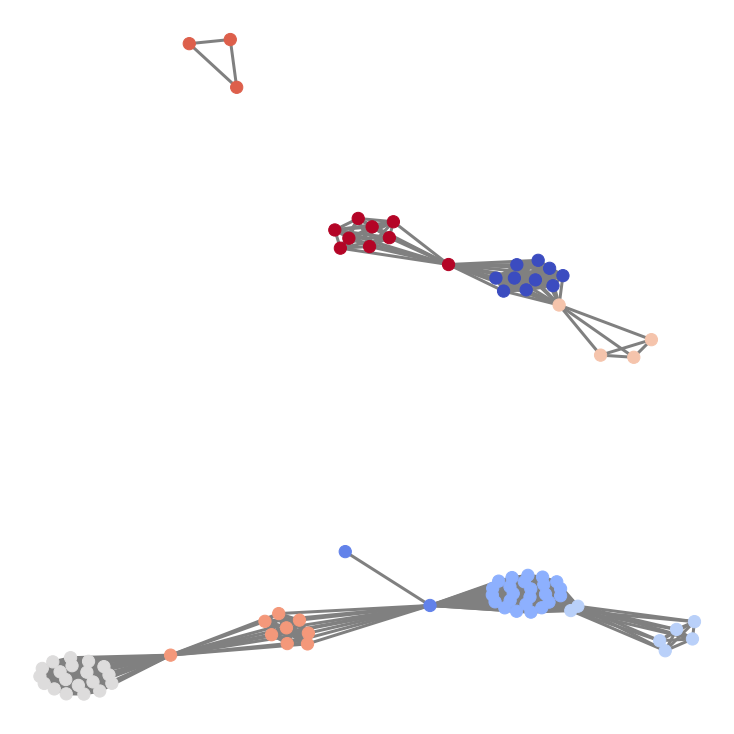

In [249]:
rcParams['figure.figsize'] = 10, 10
nx.draw(g_topic, 
        nodelist=color_lookup,
        node_size=150,
        edge_color = "grey",
        node_color=[mapper.to_rgba(i) 
                    for i in color_lookup.values()], 
        with_labels=False,
        width = 3)
plt.savefig("community_comments_topic.png")
plt.show()

In [182]:
def get_subgraph_community(g_topic, topic):
    "get each community graph"
    nodes_lst = same_topic[topic]
    plt.figure(figsize=[10,10])
    nx.draw(g_topic.subgraph(nodes_lst), 
        node_size=400,
        edge_color = "lightgrey",
        node_color="Green",
        with_labels=True,
        width = 3)
    plt.show()

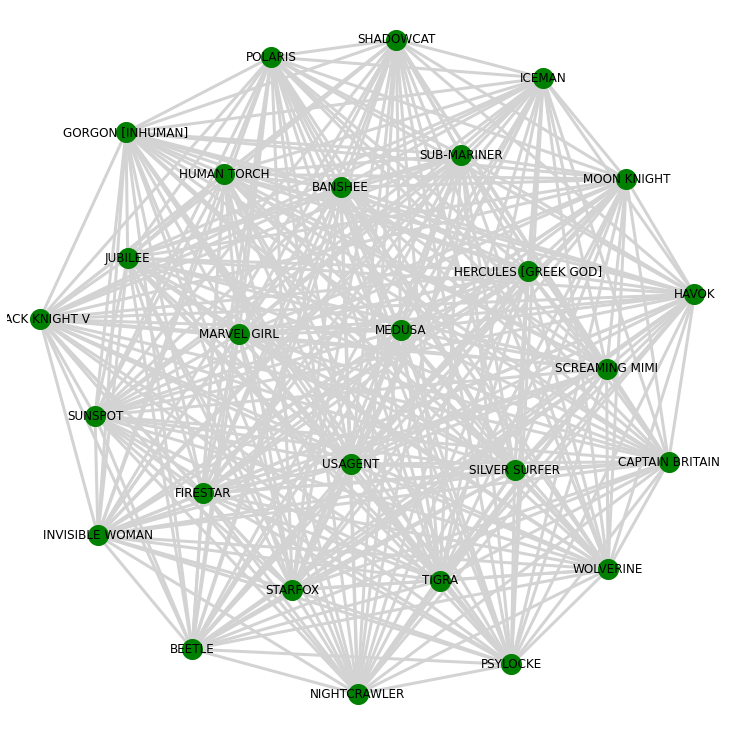

In [185]:
get_subgraph_community(g_topic, 2)

### Using word2vec for representation

In [189]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from pylab import rcParams
import networkx as nx

In [190]:
from gensim.models import Word2Vec

In [191]:
tokenized_dic = {}
for index, row in df2.iterrows():
    if row["character"] not in tokenized_dic.keys():
        tokenized_dic[row["character"]]  = []
        for word in row["tokenized_words"]:
            tokenized_dic[row["character"]].append(word)
    else:
        for word in row["tokenized_words"]:
            tokenized_dic[row["character"]].append(word)

In [192]:
tokenized_text = []
for key, value in tokenized_dic.items():
    tokenized_text.append(value)

## pre-trained model for wordtovec   

In [193]:
googlenews_w2v_model = gensim.models.KeyedVectors.load_word2vec_format("GoogleNews-vectors-negative300.bin", binary = True)

In [194]:
googlenews_w2v_model[tokenized_text[0][2]]

array([ 2.39257812e-02, -4.61425781e-02,  3.90625000e-03,  1.23535156e-01,
        6.73828125e-02,  4.49218750e-02,  2.16064453e-02, -1.17675781e-01,
        8.20312500e-02,  1.19140625e-01,  7.03125000e-02, -2.98828125e-01,
       -1.26953125e-01,  1.34887695e-02, -8.20312500e-02, -2.02636719e-02,
        2.36328125e-01,  4.00390625e-02,  1.33789062e-01, -5.56640625e-02,
       -3.73535156e-02, -3.06396484e-02,  1.56250000e-01, -1.49414062e-01,
        7.51953125e-02, -9.71679688e-02, -4.61425781e-02,  1.60156250e-01,
       -8.78906250e-03,  6.25000000e-02, -1.68945312e-01,  2.16796875e-01,
       -1.12304688e-01,  4.58984375e-02,  9.81445312e-02, -4.68750000e-02,
        2.14843750e-01, -2.17773438e-01, -9.32617188e-02,  1.17187500e-02,
        1.29882812e-01,  4.76074219e-02,  2.69531250e-01, -2.17773438e-01,
       -5.85937500e-02,  8.83789062e-02, -4.12597656e-02,  3.05175781e-02,
        8.10546875e-02,  1.44042969e-02, -8.49609375e-02, -3.85742188e-02,
       -2.43164062e-01, -

In [195]:
def represent_by_w2v():
    """
    represent reviews by averaging word embeddings 
    """
    df_w2v = []
    for review in tokenized_text:
        wd_vecs = []
        for wd in review:
            if(wd in googlenews_w2v_model):
                wd_vecs.append(googlenews_w2v_model[wd])
        df_w2v.append(list(np.mean(wd_vecs, axis=0)))
    return df_w2v

df_w2v = represent_by_w2v()

In [196]:
len(df_w2v)

87

In [197]:
character_matrix = np.array(df_w2v)

In [198]:
len(character_matrix)

87

In [200]:
import sklearn.decomposition
import sklearn.manifold

In [202]:
pcaWords_hero = sklearn.decomposition.PCA(n_components = 50).fit(character_matrix)
reducedPCA_data_hero = pcaWords_hero.transform(character_matrix)
tsneWords_hero = sklearn.manifold.TSNE(n_components = 2).fit_transform(reducedPCA_data_hero)

In [203]:
len(tsneWords_hero)

87

In [204]:
from sklearn.cluster import KMeans

In [205]:
km_hero = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=42)
y_km_hero = km_hero.fit_predict(tsneWords_hero)

In [206]:
y_km_hero

array([0, 0, 3, 4, 1, 1, 3, 3, 1, 4, 4, 3, 3, 3, 3, 1, 4, 4, 1, 4, 1, 3,
       1, 2, 0, 4, 0, 2, 0, 1, 3, 0, 1, 1, 4, 0, 1, 4, 1, 3, 2, 0, 4, 1,
       1, 4, 0, 4, 0, 0, 0, 4, 3, 1, 3, 3, 4, 4, 1, 2, 4, 1, 2, 3, 2, 0,
       4, 2, 0, 2, 4, 4, 2, 2, 3, 2, 0, 4, 3, 3, 3, 4, 0, 1, 0, 4, 2],
      dtype=int32)

-----------

## Using elbow method to determine the best number of clusters

In [239]:
def sse(n, matrix):
    """
    plot the distortions for different number of clusters
    Input:
    n is a int, the range of the number of clusters
    matrix is eigen vectors
    """
    sse_cluster = []
    for i in range(1, n):
        km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
        km.fit_predict(matrix)
        sse_cluster.append(km.inertia_)
    # plot
    plt.figure(figsize = [5,5])
    plt.plot(range(1, n), sse_cluster, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

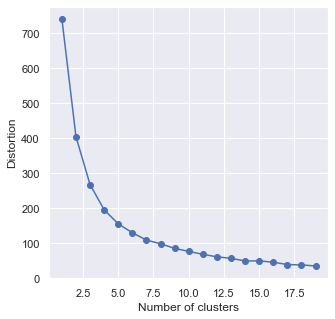

In [240]:
# dimension reduced vectors
sse(20, tsneWords_hero)

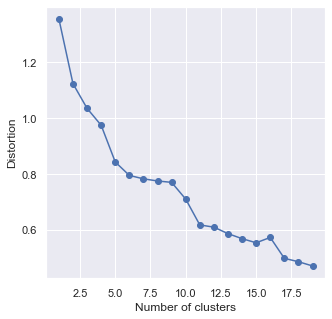

In [241]:
#no dimension reduction vectors
sse(20, character_matrix)

In [260]:
km_hero = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=42)
y_km_hero = km_hero.fit_predict(tsneWords_hero)
y_km_hero

array([7, 5, 7, 0, 9, 3, 8, 7, 2, 1, 0, 8, 8, 7, 7, 3, 1, 1, 9, 0, 9, 9,
       3, 6, 7, 1, 5, 6, 5, 3, 7, 5, 9, 3, 0, 5, 3, 1, 3, 7, 4, 2, 1, 9,
       9, 0, 5, 1, 7, 2, 7, 1, 7, 3, 8, 8, 1, 0, 2, 6, 0, 3, 6, 8, 6, 5,
       8, 6, 5, 6, 1, 1, 4, 6, 4, 7, 2, 1, 8, 4, 8, 0, 5, 2, 7, 0, 6],
      dtype=int32)

In [261]:
color_hero = {}
for i in range(len(y_km_hero)):
    color_hero[list(tokenized_dic.keys())[i]] = y_km_hero[i]
    

In [262]:
g_comment = nx.Graph()
same_cluster = {}
for key, value in color_hero.items():
    if value in same_cluster.keys():
        same_cluster[value].append(key) 
    else:
        same_cluster[value] = [key]

In [263]:
same_cluster

{7: ['CAPTAIN AMERICA',
  'IRON MAN',
  'SCARLET WITCH',
  'WASP',
  'ANT-MAN',
  'MARVEL GIRL',
  'BLACK WIDOW',
  'BLACK PANTHER',
  'CAGE, LUKE',
  'USAGENT',
  'MOONDRAGON',
  'STARFOX',
  'MOON KNIGHT'],
 5: ['SPIDER-MAN',
  'JARVIS, EDWIN ',
  'DAREDEVIL',
  'JAMESON, J. JONAH',
  'WATSON-PARKER, MARY ',
  'FIRESTAR',
  'SPEEDBALL',
  'PARKER, MAY',
  'KINGPIN'],
 0: ['THING',
  'VISION ',
  'DR. STRANGE',
  'ROGUE ',
  'RICHARDS, FRANKLIN B',
  'BINARY',
  'UATU',
  'WONG',
  'BOOMER'],
 9: ['MR. FANTASTIC',
  'SHE-HULK',
  'HULK',
  'WONDER MAN',
  'QUICKSILVER',
  'SILVER SURFER',
  'DR. DOOM'],
 3: ['WOLVERINE',
  'CYCLOPS',
  'PROFESSOR X',
  'ICEMAN',
  'NIGHTCRAWLER',
  'HAVOK',
  'SHADOWCAT',
  'POLARIS',
  'MAGNETO'],
 8: ['HUMAN TORCH',
  'INVISIBLE WOMAN',
  'HAWK',
  'IRON FIST',
  'FALCON',
  'SUNSPOT',
  'BANSHEE',
  'BEETLE',
  'BLACK BOLT'],
 2: ['THOR',
  'PSYLOCKE',
  'NAMORITA',
  'THUNDERSTRIKE',
  'JUBILEE',
  'GORGON [INHUMAN]'],
 1: ['BEAST',
  'ANGEL',
  '

In [264]:
tokenized_dic.keys()

dict_keys(['CAPTAIN AMERICA', 'SPIDER-MAN', 'IRON MAN', 'THING', 'MR. FANTASTIC', 'WOLVERINE', 'HUMAN TORCH', 'SCARLET WITCH', 'THOR', 'BEAST', 'VISION ', 'INVISIBLE WOMAN', 'HAWK', 'WASP', 'ANT-MAN', 'CYCLOPS', 'ANGEL', 'STORM', 'SHE-HULK', 'DR. STRANGE', 'HULK', 'WONDER MAN', 'PROFESSOR X', 'COLOSSUS II', 'MARVEL GIRL', 'HERCULES [GREEK GOD]', 'JARVIS, EDWIN ', 'SUB-MARINER', 'DAREDEVIL', 'ICEMAN', 'BLACK WIDOW', 'JAMESON, J. JONAH', 'QUICKSILVER', 'NIGHTCRAWLER', 'ROGUE ', 'WATSON-PARKER, MARY ', 'HAVOK', 'BLACK KNIGHT V', 'SHADOWCAT', 'BLACK PANTHER', 'CRYSTAL [INHUMAN]', 'PSYLOCKE', 'NOVA', 'SILVER SURFER', 'DR. DOOM', 'RICHARDS, FRANKLIN B', 'FIRESTAR', 'GAMBIT', 'CAGE, LUKE', 'NAMORITA', 'USAGENT', 'SERSI', 'MOONDRAGON', 'POLARIS', 'IRON FIST', 'FALCON', 'WOLFSBANE', 'BINARY', 'THUNDERSTRIKE', 'CAPTAIN MARVEL II', 'UATU', 'MAGNETO', 'MOCKINGBIRD', 'SUNSPOT', 'TIGRA', 'SPEEDBALL', 'BANSHEE', 'JUSTICE II', 'PARKER, MAY', 'PUNISHER II', 'DR. DRUID', 'FORGE', 'IRON MAN IV', 'CAPTAIN

In [265]:
import itertools
edges_cluster = []
for key, value in same_cluster.items():
    for i in list(itertools.combinations(value,2)):
        edges_cluster.append(i)
g_comment.add_edges_from(edges_cluster)

In [266]:
low, *_, high = sorted(color_hero.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

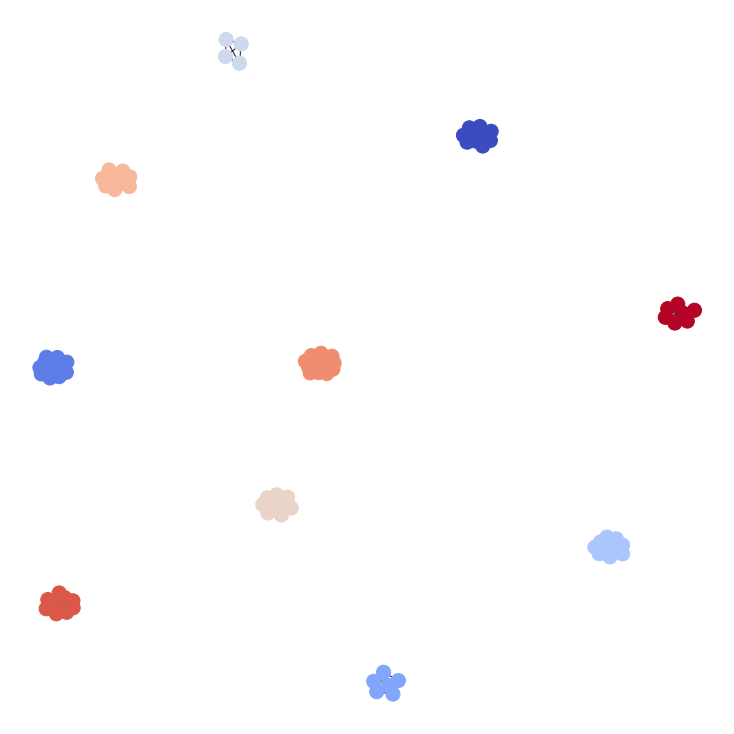

In [267]:
rcParams['figure.figsize'] = 10, 10
nx.draw(g_comment, 
        nodelist=color_hero,
        node_size=200,
        node_color=[mapper.to_rgba(i) 
                    for i in color_hero.values()], 
        with_labels=False)
plt.savefig("community_wordembedding.png")
plt.show()

---------

## Cosine similarity heatmap

In [217]:
from sklearn.metrics import pairwise_distances
sim = sklearn.metrics.pairwise.cosine_similarity(character_matrix, Y=None, dense_output=True)

In [218]:
sim

array([[1.        , 0.99203676, 0.9964303 , ..., 0.99318856, 0.9888033 ,
        0.9288634 ],
       [0.99203676, 1.        , 0.9941653 , ..., 0.991765  , 0.98341566,
        0.9291424 ],
       [0.9964303 , 0.9941653 , 1.0000005 , ..., 0.99261767, 0.9882319 ,
        0.92866427],
       ...,
       [0.99318856, 0.991765  , 0.99261767, ..., 1.0000004 , 0.9819871 ,
        0.93939984],
       [0.9888033 , 0.98341566, 0.9882319 , ..., 0.9819871 , 0.9999998 ,
        0.909996  ],
       [0.9288634 , 0.9291424 , 0.92866427, ..., 0.93939984, 0.909996  ,
        1.0000004 ]], dtype=float32)

In [219]:
sim_df = pd.DataFrame(sim, index = tokenized_dic.keys(), columns = tokenized_dic.keys() )

In [220]:
sim_df

,CAPTAIN AMERICA,SPIDER-MAN,IRON MAN,THING,MR. FANTASTIC,WOLVERINE,HUMAN TORCH,SCARLET WITCH,THOR,BEAST,...,MEDUSA,BEETLE,KARNAK [INHUMAN],BLACK BOLT,WONG,KINGPIN,GORGON [INHUMAN],MOON KNIGHT,BOOMER,SCREAMING MIMI
CAPTAIN AMERICA,1.000000,0.992037,0.996430,0.988934,0.992963,0.991330,0.992334,0.993240,0.993869,0.992240,...,0.985681,0.992044,0.961482,0.992377,0.991929,0.993011,0.967581,0.993189,0.988803,0.928863
SPIDER-MAN,0.992037,1.000000,0.994165,0.984836,0.992754,0.990209,0.987735,0.989734,0.989535,0.988442,...,0.982054,0.990245,0.953934,0.989109,0.989966,0.994208,0.964407,0.991765,0.983416,0.929142
IRON MAN,0.996430,0.994165,1.000000,0.987557,0.992592,0.991452,0.993194,0.994047,0.993795,0.992384,...,0.986397,0.993031,0.962708,0.993822,0.993056,0.993131,0.967952,0.992618,0.988232,0.928664
THING,0.988934,0.984836,0.987557,1.000000,0.986206,0.986409,0.985349,0.981748,0.988611,0.992320,...,0.983691,0.985125,0.947061,0.986670,0.988628,0.985133,0.954309,0.981329,0.991986,0.889132
MR. FANTASTIC,0.992963,0.992754,0.992592,0.986206,1.000000,0.990903,0.992044,0.992024,0.991422,0.991075,...,0.985140,0.992749,0.961033,0.991887,0.990302,0.991425,0.966043,0.993254,0.985311,0.930155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KINGPIN,0.993011,0.994208,0.993131,0.985133,0.991425,0.989716,0.987329,0.988757,0.988482,0.988431,...,0.980630,0.988014,0.959280,0.989461,0.987674,1.000000,0.967756,0.992680,0.983202,0.927660
GORGON [INHUMAN],0.967581,0.964407,0.967952,0.954309,0.966043,0.967387,0.964962,0.966328,0.966539,0.968690,...,0.964700,0.962374,0.966399,0.969945,0.962187,0.967756,1.000000,0.969790,0.953662,0.910793
MOON KNIGHT,0.993189,0.991765,0.992618,0.981329,0.993254,0.989164,0.990377,0.993981,0.990939,0.989732,...,0.985232,0.991451,0.963038,0.991619,0.989701,0.992680,0.969790,1.000000,0.981987,0.939400
BOOMER,0.988803,0.983416,0.988232,0.991986,0.985311,0.986372,0.989783,0.985665,0.985424,0.992274,...,0.987926,0.991008,0.946935,0.989646,0.988315,0.983202,0.953662,0.981987,1.000000,0.909996


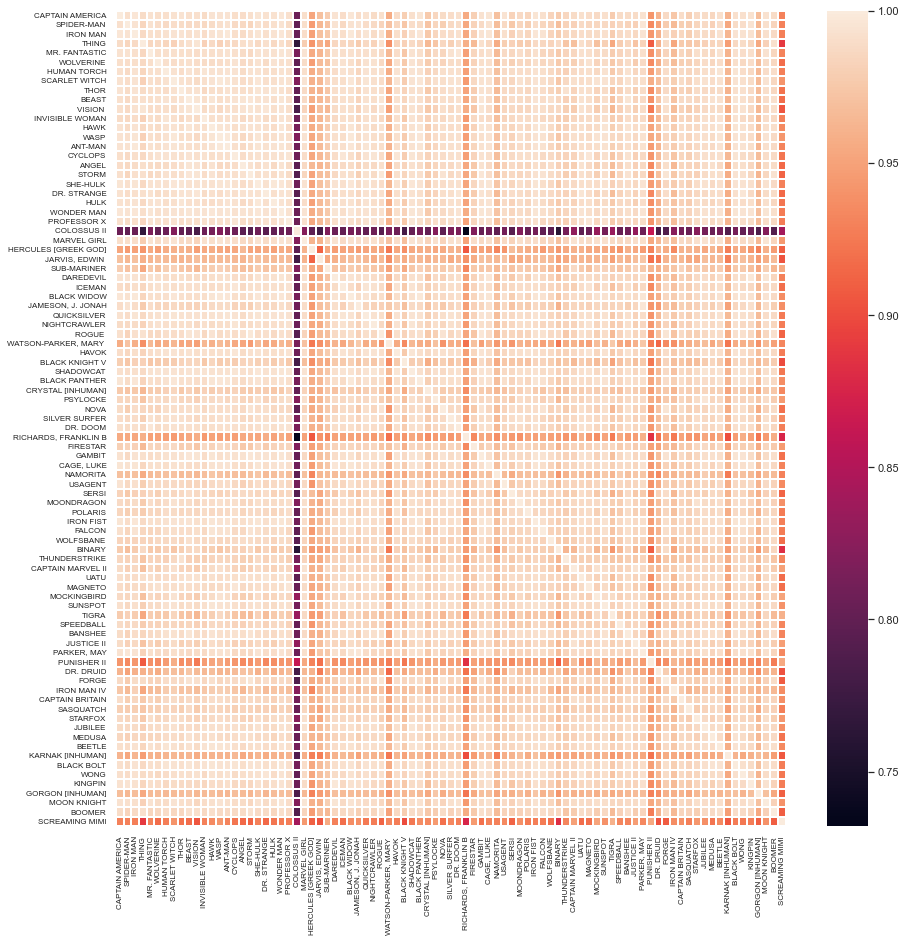

In [236]:
fig, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(sim_df, linewidths = 0.1, annot = False, xticklabels=1, yticklabels=1)
plt.xticks(fontsize=8) 
plt.yticks(fontsize=8) 
plt.savefig("pairwise similarity.png")
plt.show()